# DATA SCIENCE TASK AT THE SPARKS FOUNDATION @GRIPMAY21

## TASK 6 - Prediction using Decision Tree Algorithm
Create the Decision Tree classifier and visualize it graphically.

# by- Deepika Bisht



In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [2]:
# loading dataset
df=pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Data Visualisation

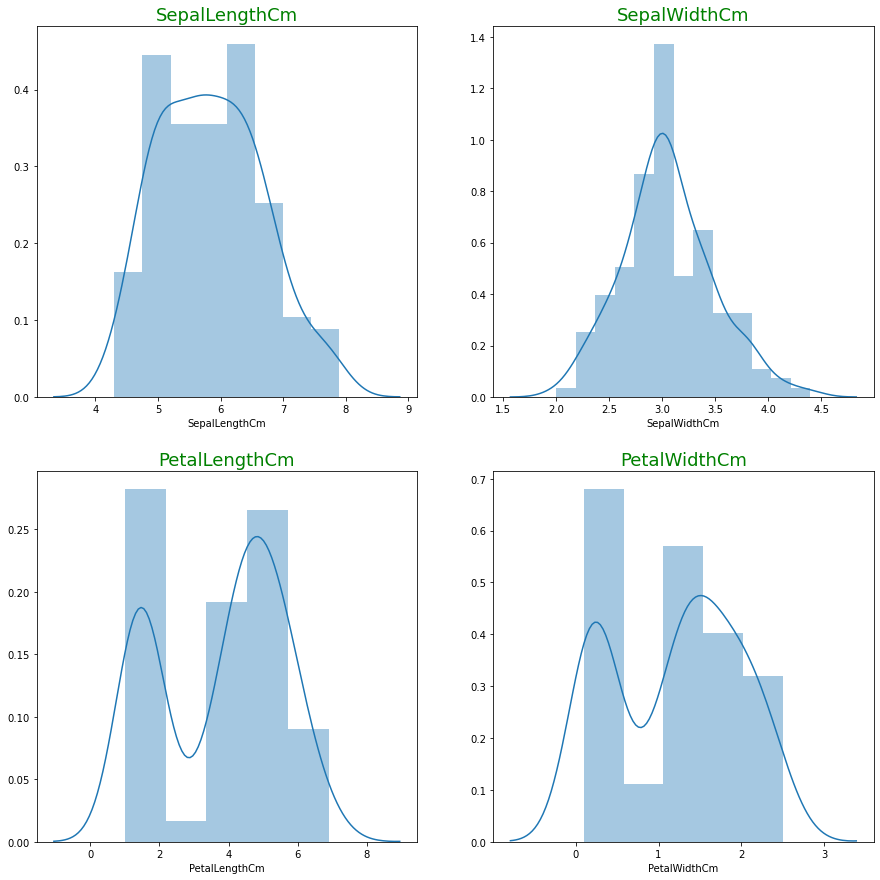

In [7]:
fig=plt.figure(figsize=(15,15))
for i in range(1,5):
    ax=fig.add_subplot(2,2,i)
    sns.distplot(df[df.columns[i]])
    ax.set_title(df.columns[i],color='green',fontsize=18)
plt.show()

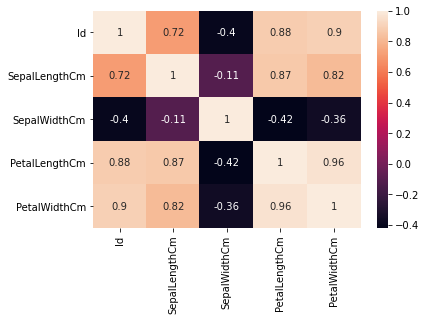

In [8]:
df.corr()
sns.heatmap(df.corr(), annot=True)

PetalLength and PetalWidth have highest positive correlation

### Now let us define the Decision Tree Algorithm

In [9]:
from sklearn.preprocessing import LabelEncoder

encode=LabelEncoder()
df["Target"]=encode.fit_transform(df["Species"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
 6   Target         150 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 7.7+ KB


In [10]:
#train test split
X=df.drop(["Species","Id","Target"],axis=1)
y=df["Target"]

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.35,random_state=2021)
print(df.shape)
print("X_train shape=",X_train.shape)
print("Y_train shape=",Y_train.shape)
print("X_test shape=",X_test.shape)
print("Y_test shape=",Y_test.shape)

(150, 7)
X_train shape= (97, 4)
Y_train shape= (97,)
X_test shape= (53, 4)
Y_test shape= (53,)


In [11]:
# model building
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier(criterion='gini',max_depth=3)
dtree.fit(X_train,Y_train)
print('Decision Tree Classifer Created')

Decision Tree Classifer Created


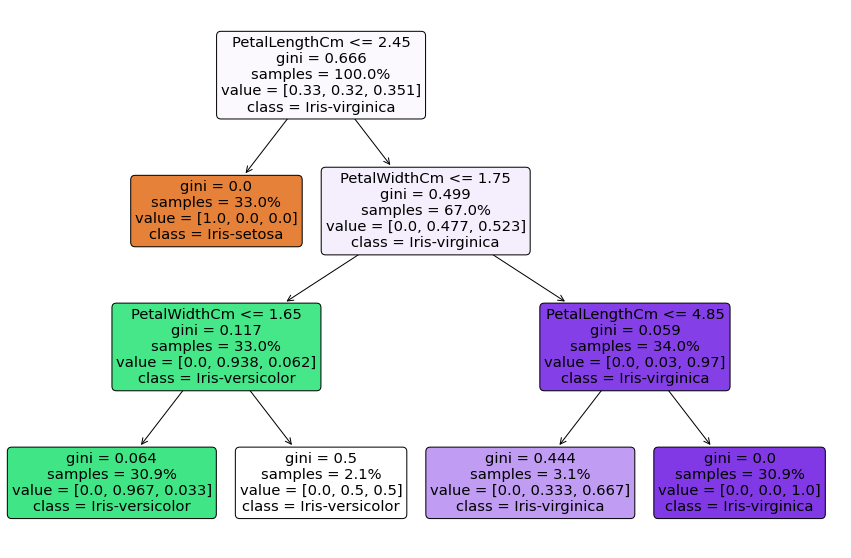

In [12]:
from sklearn import tree

FeatureNames=['SepalLengthCm', 'SepalWidthCm', 
                    'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize = (15,10))
tree.plot_tree(dtree, feature_names= FeatureNames , class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
               filled = True, precision = 3,proportion =True, rounded = True)
plt.show()


In [13]:
# PREDICTION

y_pred=dtree.predict(X_test)
print(y_pred)
print('Iris-setosa=0 , Iris-versicolor=1, Iris-virginica=2')

[0 0 1 0 0 0 0 0 0 0 0 1 2 2 1 2 1 1 0 1 1 2 1 0 1 1 1 1 0 0 1 1 0 2 1 1 2
 0 2 1 2 2 0 1 1 1 2 2 1 1 2 0 2]
Iris-setosa=0 , Iris-versicolor=1, Iris-virginica=2


In [14]:
print("TESTING ACCURACY OF DECISION TREE MODEL={}%".format(round(dtree.score(X_test,Y_test)*100,2)))

TESTING ACCURACY OF DECISION TREE MODEL=94.34%


In [15]:
from sklearn import metrics  
print('Mean Absolute Error:{}%'.format(round(metrics.mean_absolute_error(Y_test, y_pred)*100,3)))


Mean Absolute Error:5.66%
